In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [225]:
df = pd.read_csv('../logs/random1.csv', sep='\t')

In [226]:
df.head()

,|V|,|E|,approx_time,approx,optimal_time,optimal
0,7,8,0.019,3270,0.386,1784
1,7,14,0.014,1935,0.616,1683
2,7,5,0.009,1513,0.270,1368
3,7,10,0.009,1810,0.435,1567
4,7,9,0.008,3284,0.401,2203


In [227]:
def ratio1():
    approx = np.cumsum(df['approx'])
    optimal = np.cumsum(df['optimal'])
    ratio1 = []
    for i in np.arange(100, 5000, 100):
        ratio1.append(float(approx[i]) / float(optimal[i]))
        
    return ratio1

In [228]:
def plot1(ratio1, param1, param2):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    x = np.arange(100, 5000, 100)

    ax.set_title('График отношения приближенного и точного веса минимального вершинного покрытия для G({}, {})'.format(param1, param2), fontdict={'size': 15})
    ax.set_ylabel('Отношение', fontdict={'size': 14})
    ax.set_xlabel('Количество тестов', fontdict={'size': 14})
    ax.scatter(x, ratio1, color='red', label='Отношение весов')
    ax.legend(loc='best')
    
    plt.ylim(1.27, 1.37)

    plt.show()

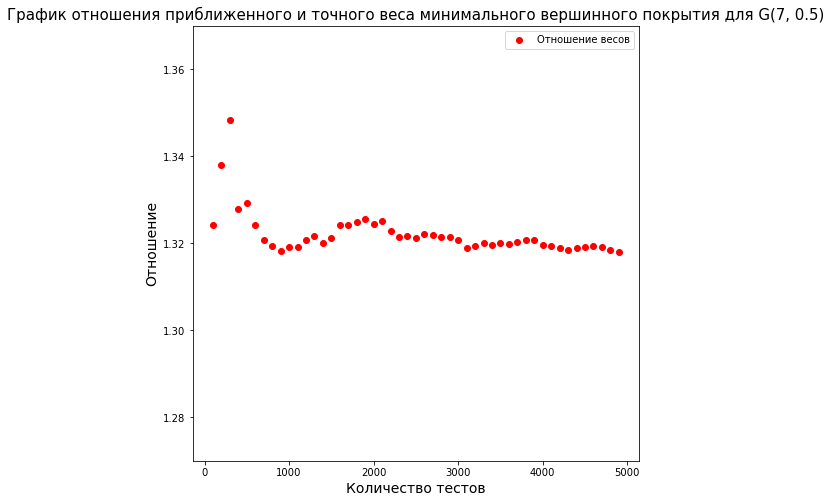

In [229]:
plot1(ratio1(), 7, 0.5)

In [230]:
def ratio2():
    approx = np.cumsum(df['approx_time'])
    optimal = np.cumsum(df['optimal_time'])
    ratio2 = []
    for i in np.arange(100, 5000, 100):
        ratio2.append(float(approx[i]) / float(optimal[i]))
        
    return ratio2

In [231]:
def plot2(ratio2, param1, param2):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    x = np.arange(100, 5000, 100)

    ax.set_title('График отношения времени работы алгоритма приближенного и оптимального нахождения покрытия для G({}, {})'.format(param1, param2), fontdict={'size': 15})
    ax.set_ylabel('Отношение времени работы', fontdict={'size': 14})
    ax.set_xlabel('Количество тестов', fontdict={'size': 14})
    ax.scatter(x, ratio2, color='blue', label='Отношение времен работы')
    ax.legend(loc='best')

    plt.show()

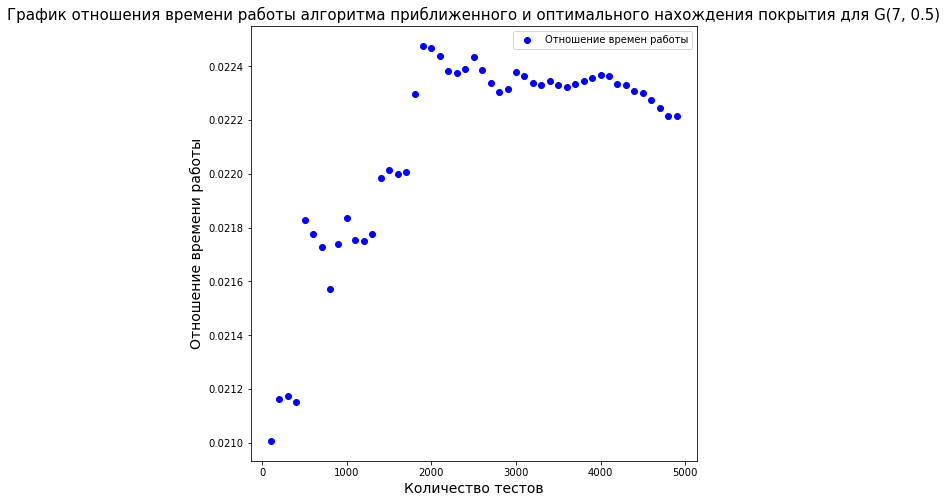

In [232]:
plot2(ratio2(), 7, 0.5)

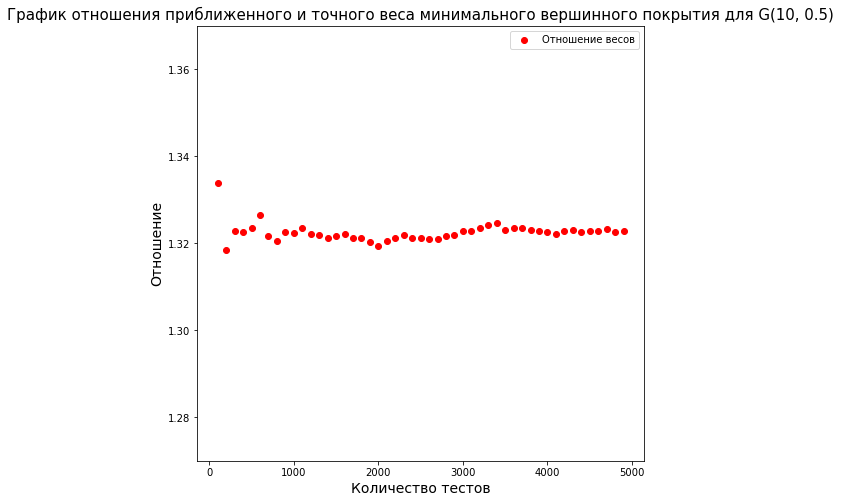

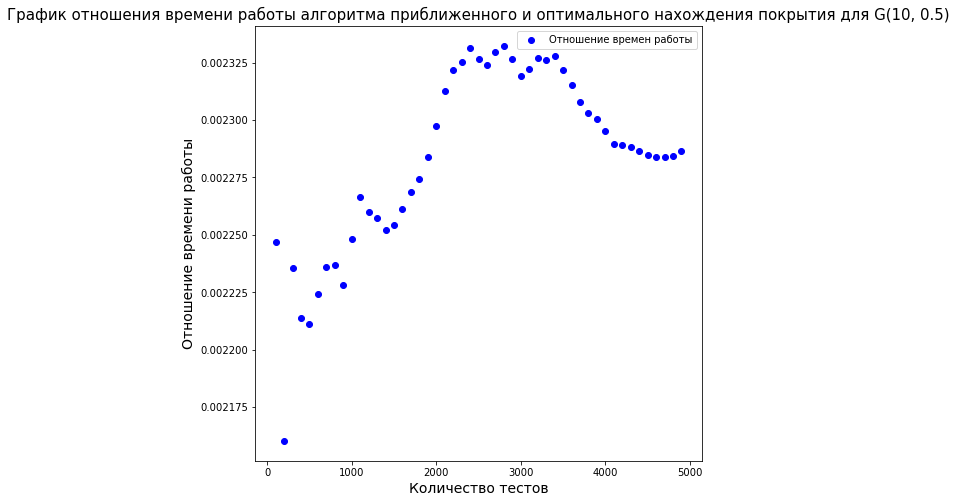

In [233]:
df = pd.read_csv('../logs/random2.csv', sep='\t')
plot1(ratio1(), 10, 0.5)
plot2(ratio2(), 10, 0.5)

In [234]:
def ratio3():
    approx = np.cumsum(df['approx_time'])
    optimal = np.cumsum(df['optimal_time'])
    ratio3 = []
    for i in np.arange(0, 20, 1):
        ratio3.append(float(approx[i]) / float(optimal[i]))
        
    return ratio3

In [235]:
def plot3(ratio3, xlim, ylim):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    x = range(2, 22, 1)

    ax.set_title('График отношения времени работы алгоритма приближенного и оптимального нахождения покрытия для corner-case графа', fontdict={'size': 15})
    ax.set_ylabel('Отношение времени работы', fontdict={'size': 14})
    ax.set_xlabel('Количество вершин', fontdict={'size': 14})
    ax.scatter(x, ratio3, color='red', label='Отношение весов')
    ax.legend(loc='best')
    
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    
    formatter = ticker.StrMethodFormatter("{x:.0f}")
    plt.gca().xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

    plt.show()

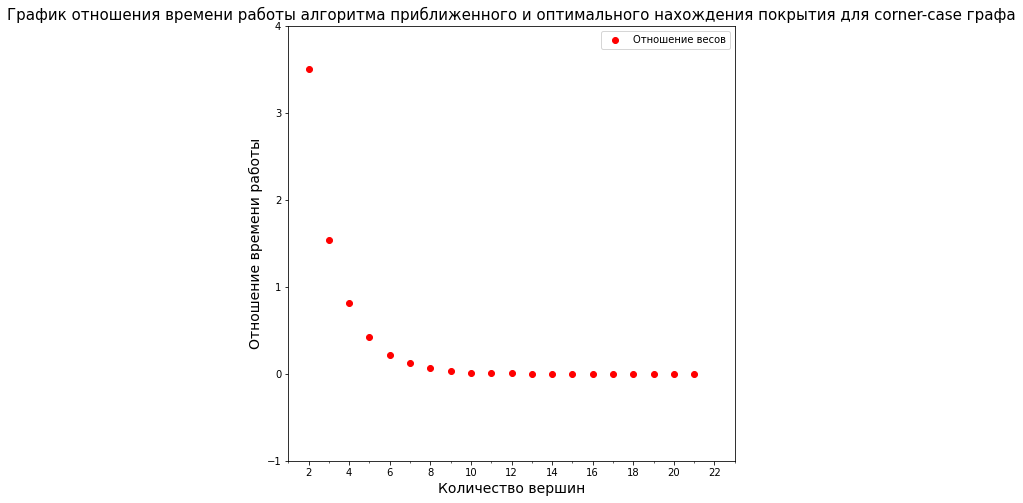

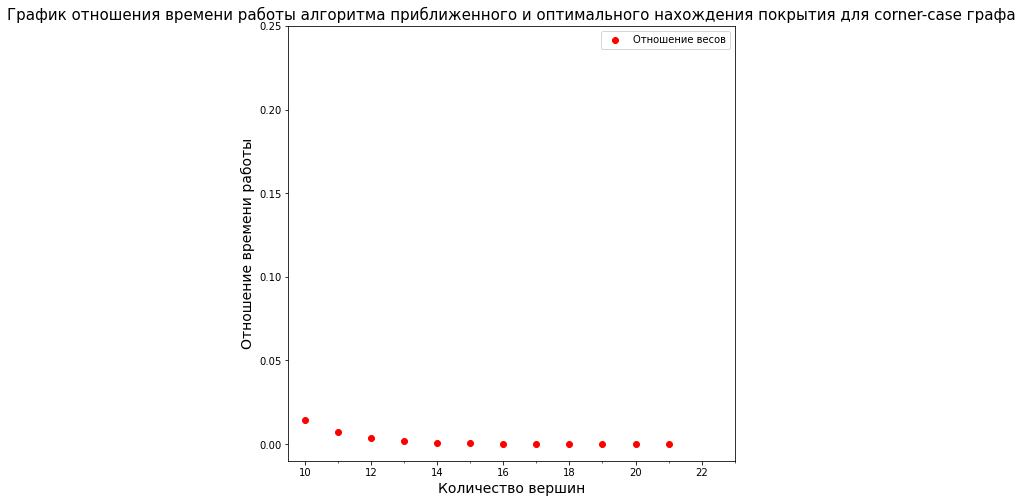

In [236]:
df = pd.read_csv('../logs/corner.csv', sep='\t')
plot3(ratio3(), (1, 23), (-1, 4))
plot3(ratio3(), (9.5, 23), (-0.01, 0.25))

In [237]:
df1 = pd.read_csv('../logs/random3.csv', sep='\t')
df2 = pd.read_csv('../logs/random4.csv', sep='\t')
df3 = pd.read_csv('../logs/random5.csv', sep='\t')

In [238]:
def plot4():
    fig, ax = plt.subplots(figsize=(8, 8))
    
    x = range(2, 22, 1)

    ax.set_title('График зависимости времени работы алгоритма от размера графа G(n, p) для некоторых p', fontdict={'size': 15})
    ax.set_ylabel('Время работы', fontdict={'size': 14})
    ax.set_xlabel('Количество вершин', fontdict={'size': 14})
    ax.scatter(df1['|V|'], df1['approx_time'], color='red', label='time(|V|), p = 0.5', alpha=0.5)
    ax.scatter(df2['|V|'], df2['approx_time'], color='blue', label='time(|V|), p = 0.7', alpha=0.5)
    ax.scatter(df3['|V|'], df3['approx_time'], color='green', label='time(|V|), p = 0.9', alpha=0.5)
    ax.legend(loc='best')

    plt.show()

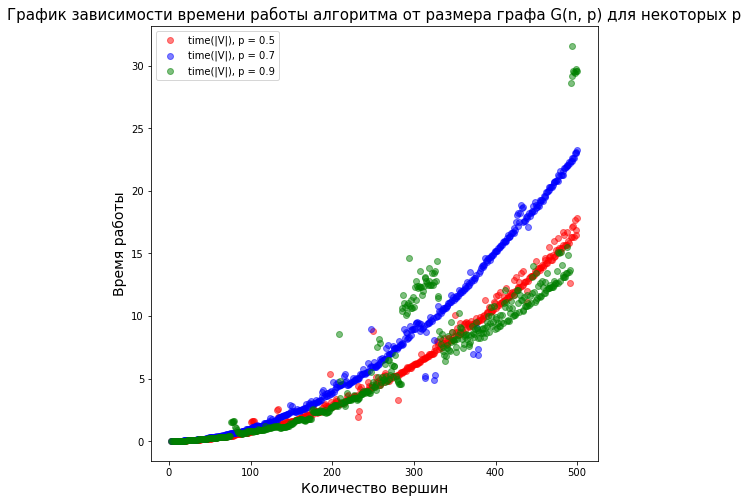

In [239]:
plot4()